<a href="https://colab.research.google.com/github/kotatakehara/Self-efficacy/blob/draft/Kendama_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
def Nonajustment(r,B,alpha,beta,a): #難易度を調整しない場合の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  x = []
  for i in range(len(B)):
    x.append(i)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
  x.append(len(B))
  return x,p,dispersion


In [ ]:
def Min_ajustment(r,B,alpha,beta,a,rt): #難易度を調整した場合の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  success_rate = 0.66 #難易度調整を行う際の成功率の指標
  success = 0    #成功回数を表す変数
  trial = 0       #試行回数を表す変数
  x = []
  R = []
  R.append(r)
  for i in range(len(B)):
    trial += 1
    x.append(i)
    R.append(r)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      success += 1
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
    if trial >= 4 and success/trial >= success_rate:
      trial = 0
      success = 0
      r -= rt
      if r <= 0:
        r = 0.5
  x.append(len(B))
  return x,p,dispersion,R

In [ ]:
def Max_ajustment(r,B,alpha,beta,a,rt): #難易度を調整した場合（半径を小さくする場合のみ）の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  success_rate = 0.66 #難易度調整を行う際の成功率の指標
  fail_rate = 0.66 #難易度調整を行う際の失敗率の指標
  success = 0    #成功回数を表す変数
  trial = 0       #試行回数を表す変数
  x = []
  R = []
  R.append(r)
  for i in range(len(B)):
    trial += 1
    x.append(i)
    R.append(r)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      success += 1
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
    if trial >= 4 and (trial-success)/trial >= fail_rate:
      trial = 0
      success = 0
      r += rt
  x.append(len(B))
  return x,p,dispersion,R

In [ ]:
def Ajustment(r,B,alpha,beta,a,rt): #難易度を調整した場合（半径を小さくしたり大きくしたり）の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  success_rate = 0.66 #難易度調整を行う際の成功率の指標
  fail_rate = 0.66 #難易度調整を行う際の失敗率の指標
  success = 0    #成功回数を表す変数
  trial = 0       #試行回数を表す変数
  x = []
  R = []
  R.append(r)
  for i in range(len(B)):
    trial += 1
    x.append(i)
    R.append(r)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      success += 1
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
    if trial >= 4 and success/trial >= success_rate:
      trial = 0
      success = 0
      r -= rt
      if r <= 0:    #半径が０以下にならないようにするための処置
        r = 0.5
    elif trial >= 4 and (trial-success)/trial >= fail_rate:
      trial = 0
      success = 0
      r += rt
  x.append(len(B))
  return x,p,dispersion,R

In [ ]:
def Kendama(alpha, beta,a,rt):
    r = 1  # 皿の半径を表す変数
    B = np.random.normal(loc=0, scale=1, size=200)  # けん玉の落下データを格納する配列（locは平均、scaleは標準偏差、sizeは導かれる値の数）
    Non_r = []  # 各半径での変化を格納すための配列

    # 各半径の変化を計算
    for i in range(5, 35, 5):
        r = i / 10
        Non_x, Non_p, Non_dispersion = Nonajustment(r, B, alpha, beta, a)
        Non = [Non_x, Non_p, Non_dispersion]
        Non_r.insert(len(Non_r), Non)

    # 各半径の変化を描画
    fig, axs = plt.subplots(len(Non_r), 2, figsize=(14, 2 * len(Non_r)), dpi=100, sharey="col")
    fig.subplots_adjust(hspace=0.5)
    for i, (Non_x, Non_p, Non_dispersion) in enumerate(Non_r):
        axs[i, 0].plot(Non_x, Non_p, color='r')
        axs[i, 1].plot(Non_x, Non_dispersion, color='b')

        axs[i, 0].set_title(f"r={0.5*(i+1)}, mean")
        axs[i, 1].set_title(f"r={0.5*(i+1)}, dispersion")


    plt.tight_layout()
    plt.show()

    #半径を小さくする場合のみの分散データを格納
    data_list = []

    for i in range(5):
        r = 3.0
        Yes_x, Yes_p, Yes_dispersion, R = Min_ajustment(r, B, alpha, beta, a,rt)
        data_list.append((Yes_x, Yes_p, Yes_dispersion, R))

    # サブプロットの設定
    fig, axs = plt.subplots(len(data_list), 3, figsize=(14, 2 * len(data_list)), sharey="col")

    # グラフのプロット
    for i, (Yes_x, Yes_p, Yes_dispersion, R) in enumerate(data_list):
        axs[i, 0].plot(Yes_x, Yes_p, color='r')
        axs[i, 1].plot(Yes_x, Yes_dispersion, color='b')
        axs[i, 2].plot(Yes_x, R, color='g')

        axs[i, 0].set_title(f"mean (Trial {i+1})")
        axs[i, 1].set_title(f"dispersion (Trial {i+1})")
        axs[i, 2].set_title(f"r (Trial {i+1})")

    plt.tight_layout()
    plt.show()

    # 簡単な方から調整した場合の分散のデータを格納
    A_list = []

    for i in range(5):
        r = 3.0
        A_x, A_p, A_dispersion, R = Ajustment(r, B, alpha, beta, a,rt)
        A_list.append((A_x, A_p, A_dispersion, R))

    # サブプロットの設定
    fig, axs = plt.subplots(len(A_list), 3, figsize=(14, 2 * len(A_list)), sharey="col")

    # グラフのプロット
    for i, (A_x, A_p, A_dispersion, R) in enumerate(A_list):
        axs[i, 0].plot(A_x, A_p, color='r')
        axs[i, 1].plot(A_x, A_dispersion, color='b')
        axs[i, 2].plot(A_x, R, color='g')

        axs[i, 0].set_title(f"mean (Trial {i+1})")
        axs[i, 1].set_title(f"dispersion (Trial {i+1})")
        axs[i, 2].set_title(f"r (Trial {i+1})")

    plt.tight_layout()
    plt.show()

    # 難しい方から調整した場合の分散のデータを格納
    A_min_list = []

    for i in range(5):
        r = 0.5
        A_x, A_p, A_dispersion, R = Ajustment(r, B, alpha, beta, a,rt)
        A_min_list.append((A_x, A_p, A_dispersion, R))

    # サブプロットの設定
    fig, axs = plt.subplots(len(A_min_list), 3, figsize=(14, 2 * len(A_min_list)), sharey="col")

    # グラフのプロット
    for i, (A_x, A_p, A_dispersion, R) in enumerate(A_min_list):
        axs[i, 0].plot(A_x, A_p, color='r')
        axs[i, 1].plot(A_x, A_dispersion, color='b')
        axs[i, 2].plot(A_x, R, color='g')

        axs[i, 0].set_title(f"mean (Trial {i+1})")
        axs[i, 1].set_title(f"dispersion (Trial {i+1})")
        axs[i, 2].set_title(f"r (Trial {i+1})")

    plt.tight_layout()
    plt.show()

    # 半径を大きくした場合のみの分散データを格納
    Max_data = []

    for i in range(5):
        r = 0.5
        max_x, max_p, max_dispersion, max_R = Max_ajustment(r, B, alpha, beta, a,rt)
        Max_data.append((max_x, max_p, max_dispersion, max_R))

    # サブプロットの設定
    fig, axs = plt.subplots(len(Max_data), 3, figsize=(14, 2* len(Max_data)),sharey="col")

    # グラフのプロット
    for i, (max_x, max_p, max_dispersion, max_R) in enumerate(Max_data):
        axs[i, 0].plot(max_x, max_p,color='r')
        axs[i, 1].plot(max_x, max_dispersion,color='b')
        axs[i, 2].plot(max_x, max_R,color='g')

        axs[i, 0].set_title(f"mean (Trial {i+1})")
        axs[i, 1].set_title(f"dispersion (Trial {i+1})")
        axs[i, 2].set_title(f"r (Trial {i+1})")

    # レイアウトの調整
    plt.tight_layout()

    # グラフの表示
    plt.show()

        # プロットするデータのリスト
    data = []

    for i in range(5):
        r = 0
        Yes_x, Yes_p, Yes_dispersion, R = Min_ajustment(r, B, alpha, beta, a,rt)
        data.append((Yes_x, Yes_p, Yes_dispersion, R))

    # サブプロットの設定
    fig, axs = plt.subplots(len(data), 3, figsize=(14, 2* len(data)),sharey="col")

    # グラフのプロット
    for i, (Yes_x, Yes_p, Yes_dispersion, R) in enumerate(data):
        axs[i, 0].plot(Yes_x, Yes_p,color='r')
        axs[i, 1].plot(Yes_x, Yes_dispersion,color='b')
        axs[i, 2].plot(Yes_x, R,color='g')

        axs[i, 0].set_title(f"mean (Trial {i+1})")
        axs[i, 1].set_title(f"dispersion (Trial {i+1})")
        axs[i, 2].set_title(f"r (Trial {i+1})")

    # レイアウトの調整
    plt.tight_layout()

    # グラフの表示
    plt.show()

    # サブプロットの設定
    fig, axs = plt.subplots(3, 5, figsize=(16, 2* 3),sharey="row")

    axs[0, 0].plot(data_list[0][0], data_list[0][1],color='r')
    axs[1, 0].plot(data_list[0][0], data_list[0][2],color='b')
    axs[1, 0].set_ylim(0,2)
    axs[2, 0].plot(data_list[0][0], data_list[0][3],color='g')
    axs[0, 0].set_title(f"mean (Ajustment_only_low)")
    axs[1, 0].set_title(f"dispersion (Ajustment_only_low)")
    axs[2, 0].set_title(f"r (Ajustment_only_low)")

    axs[0, 1].plot(Max_data[0][0], Max_data[0][1],color='r')
    axs[1, 1].plot(Max_data[0][0], Max_data[0][2],color='b')
    axs[2, 1].plot(Max_data[0][0], Max_data[0][3],color='g')
    axs[0, 1].set_title(f"mean (Ajustment_only_high))")
    axs[1, 1].set_title(f"dispersion (Ajustment_only_high)")
    axs[2, 1].set_title(f"r (Ajustment_only_high)")

    axs[0, 2].plot(A_list[0][0], A_list[0][1],color='r')
    axs[1, 2].plot(A_list[0][0], A_list[0][2],color='b')
    axs[2, 2].plot(A_list[0][0], A_list[0][3],color='g')
    axs[0, 2].set_title(f"mean (Ajustment_from_max)")
    axs[1, 2].set_title(f"dispersion (Ajustment_from_max)")
    axs[2, 2].set_title(f"r (Ajustment_from_max)")
    # グラフのプロット
    axs[0, 3].plot(A_min_list[0][0], A_min_list[0][1],color='r')
    axs[1, 3].plot(A_min_list[0][0], A_min_list[0][2],color='b')
    axs[2, 3].plot(A_min_list[0][0], A_min_list[0][3],color='g')
    axs[0, 3].set_title(f"mean (Ajustment_from_min)")
    axs[1, 3].set_title(f"dispersion (Ajustment_from_min)")
    axs[2, 3].set_title(f"r (Ajustment_from_min)")

    axs[0, 4].plot(data[0][0], data[0][1],color='r')
    axs[1, 4].plot(data[0][0], data[0][2],color='b')
    axs[2, 4].plot(data[0][0], data[0][3],color='g')
    axs[0, 4].set_title(f"mean (unsuccessful)")
    axs[1, 4].set_title(f"dispersion (unsuccessful)")
    axs[2, 4].set_title(f"r (unsuccessful)")

    # レイアウトの調整
    plt.tight_layout()
    plt.savefig("Ajustment.png")
    files.download('Ajustment.png')
    # グラフの表示
    plt.show()


    return 0


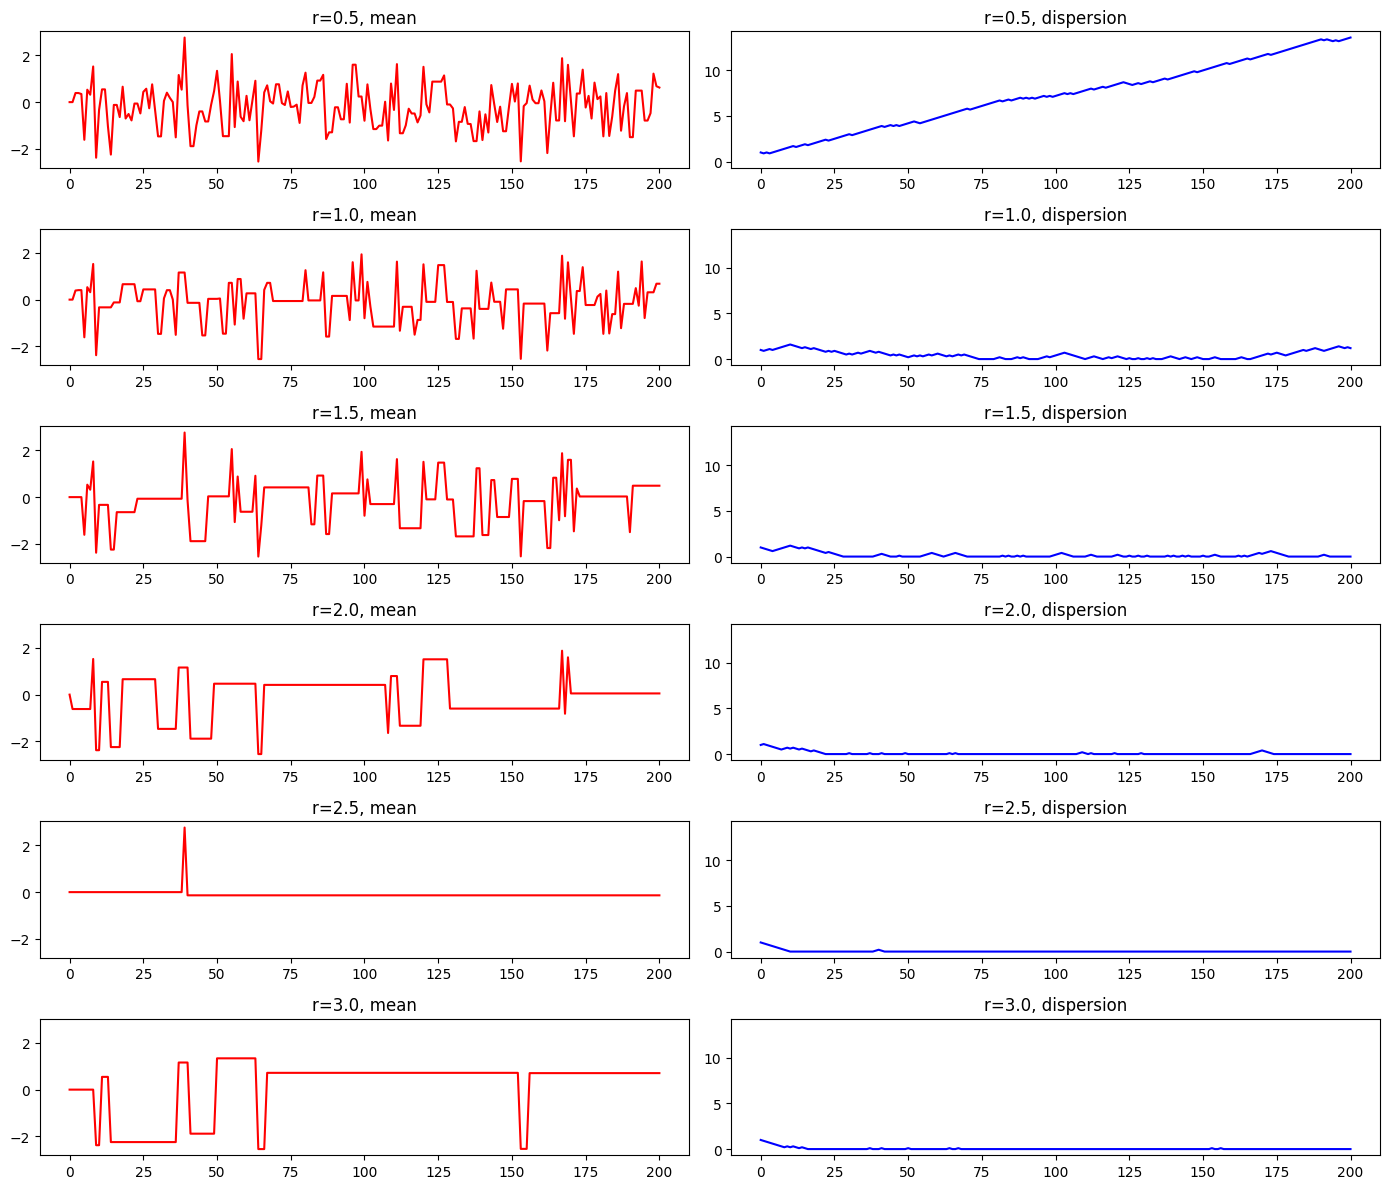

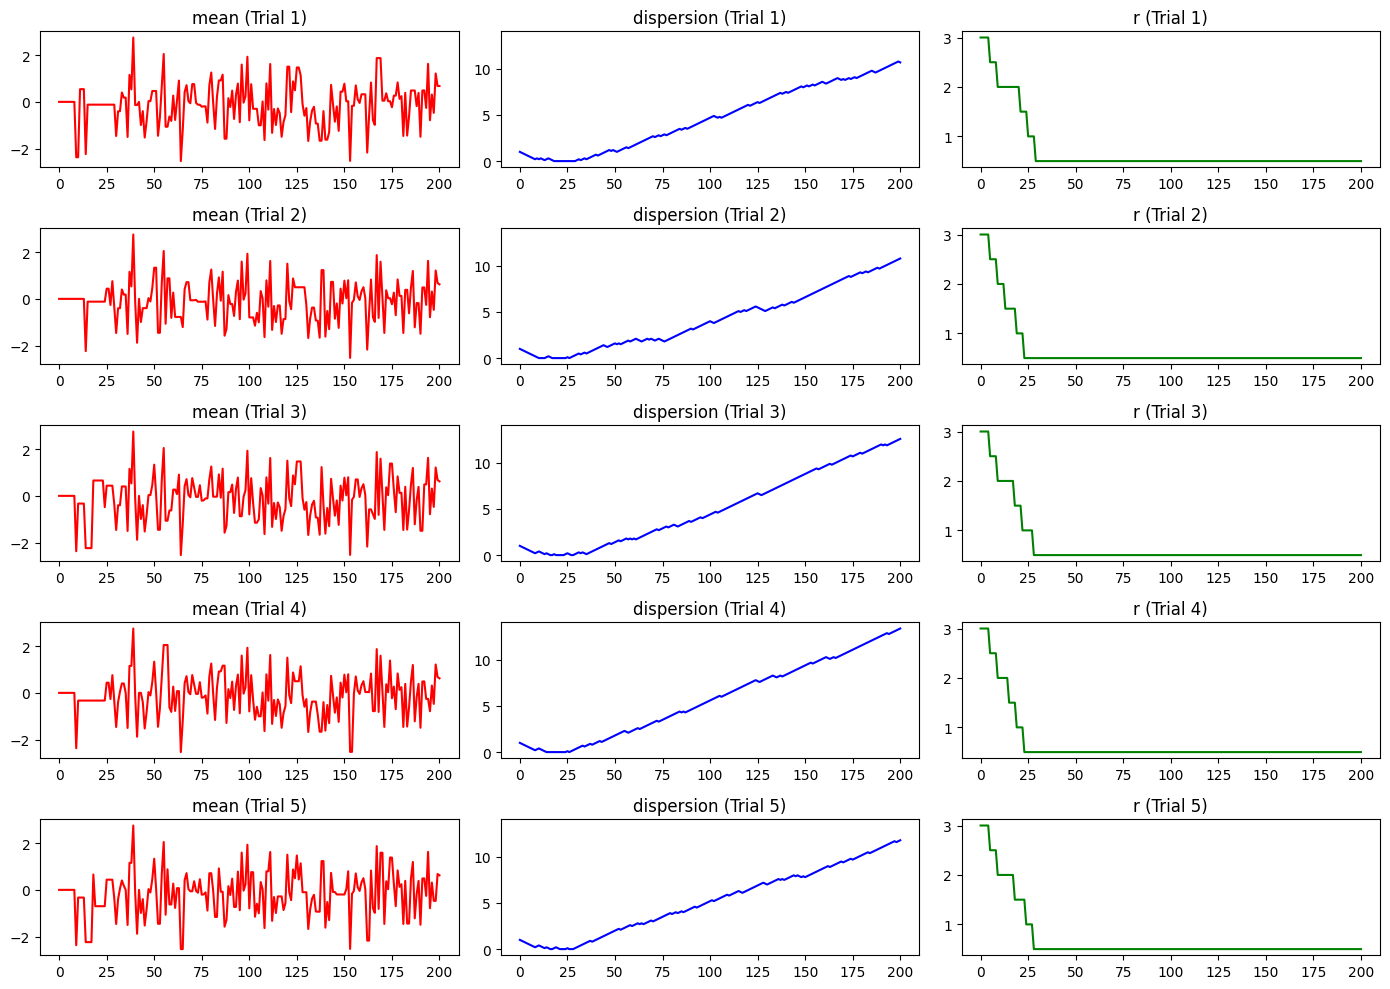

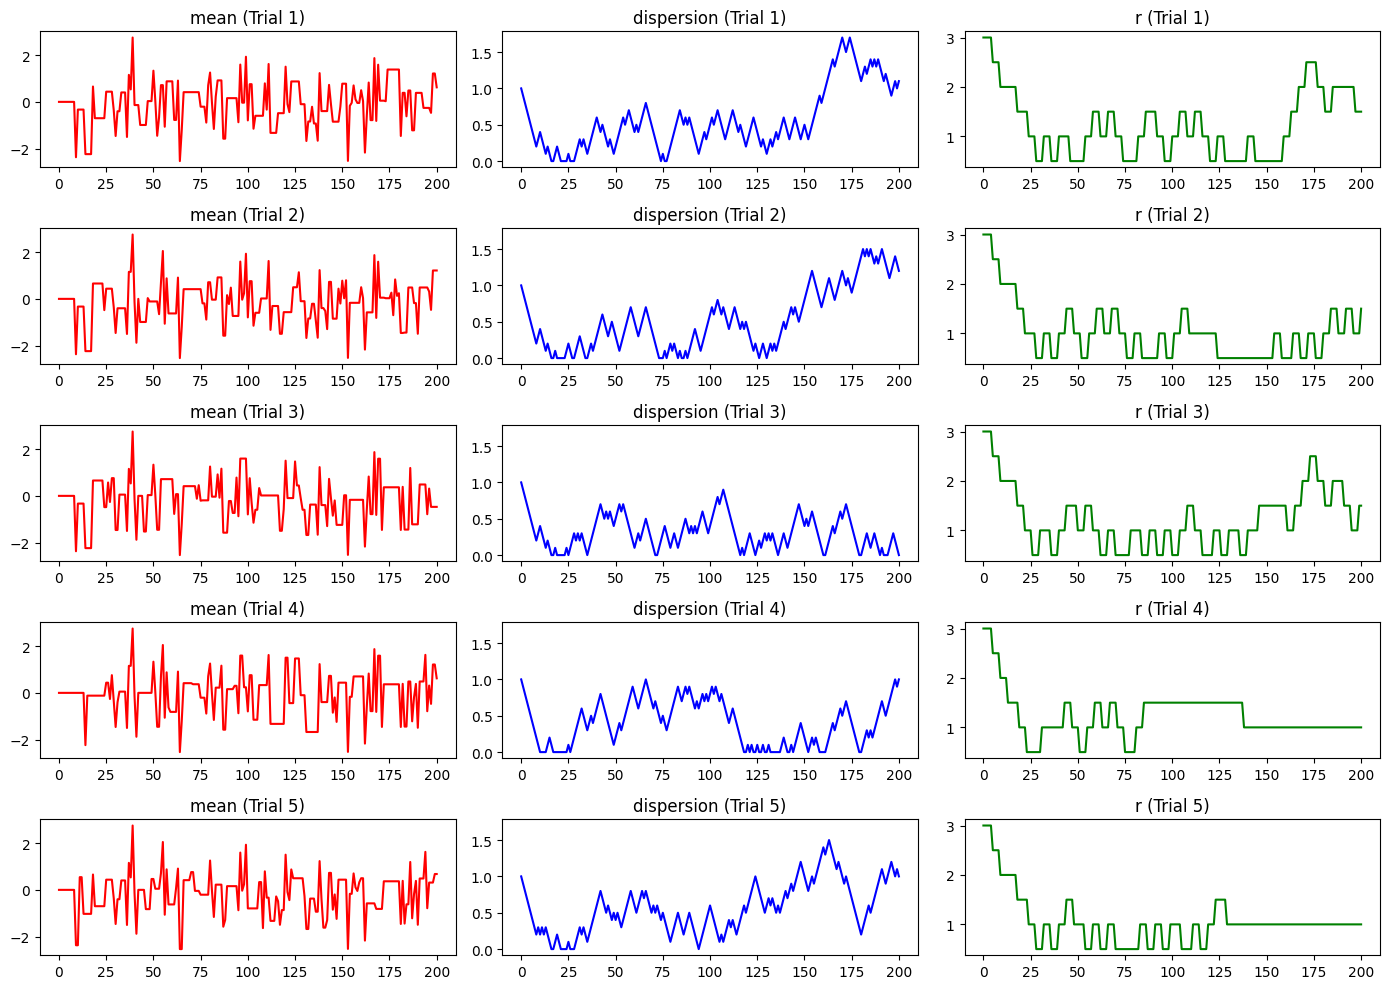

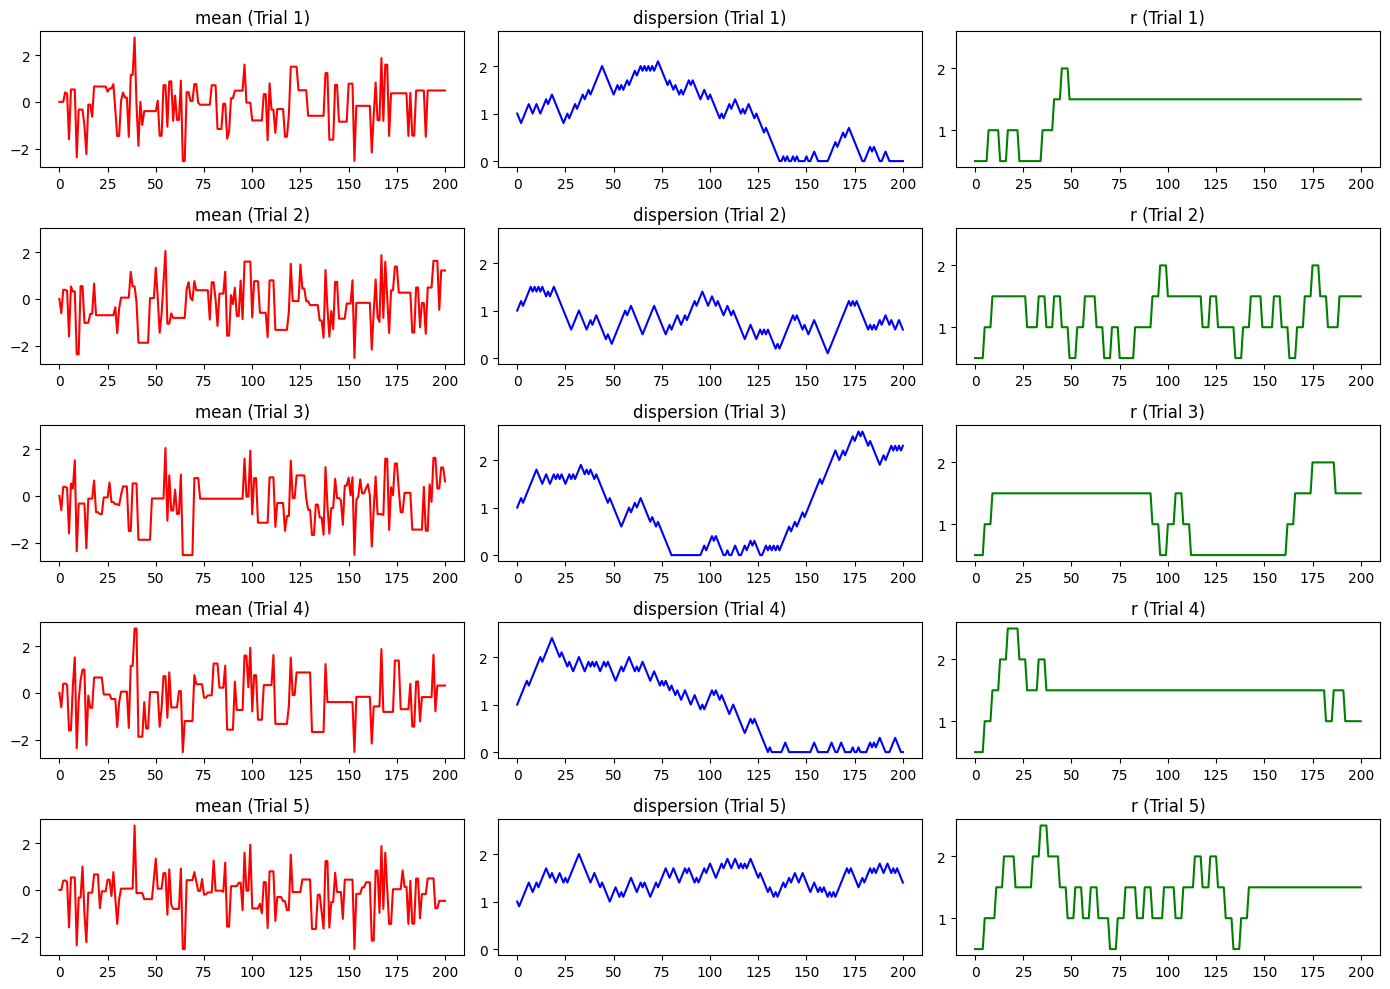

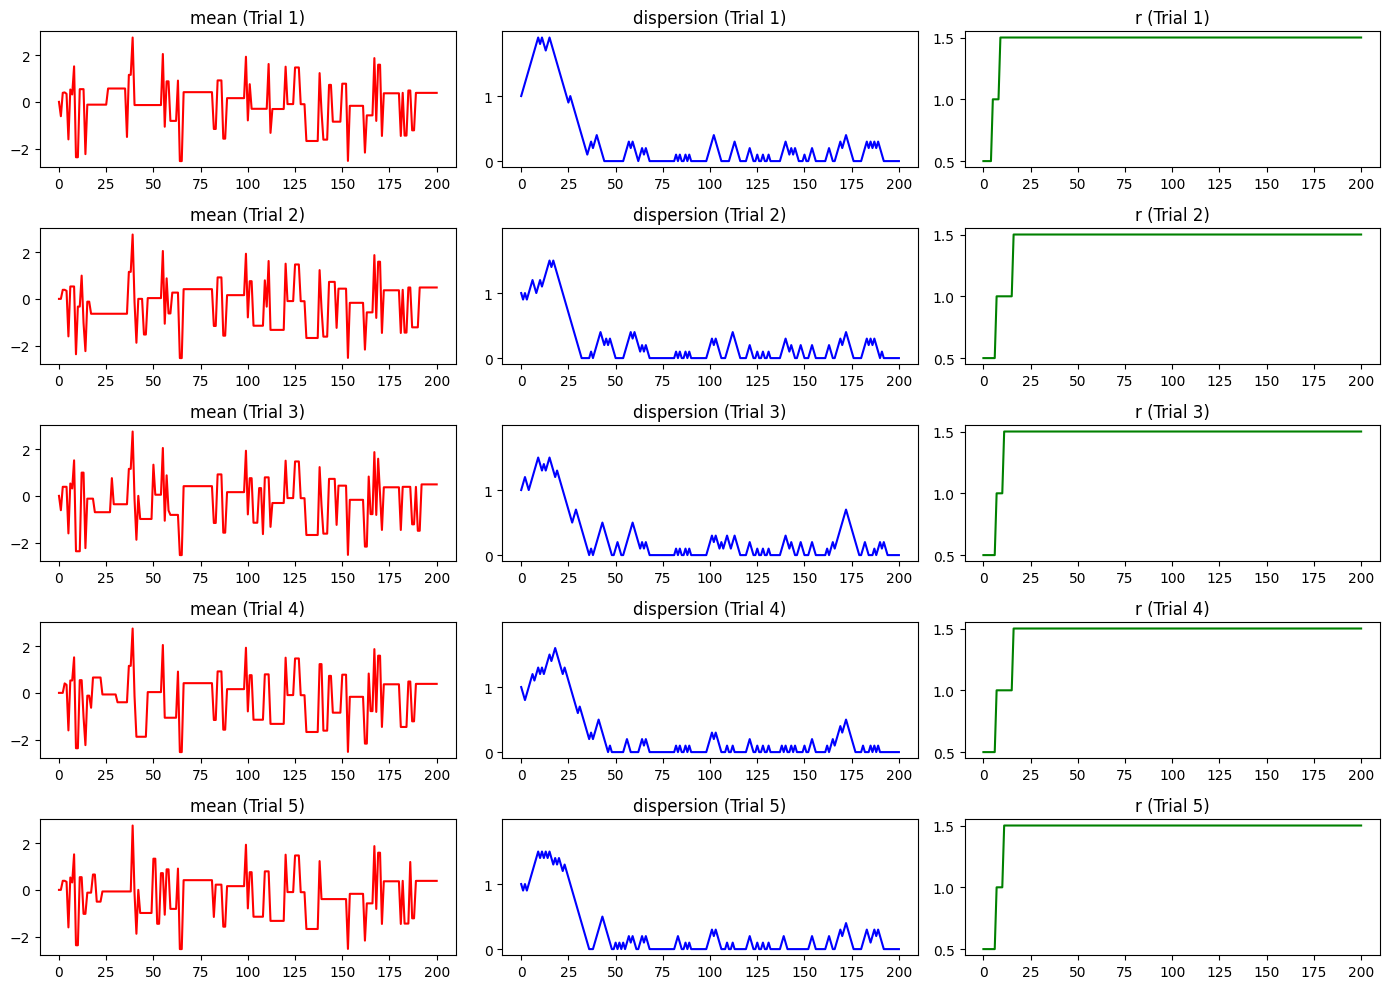

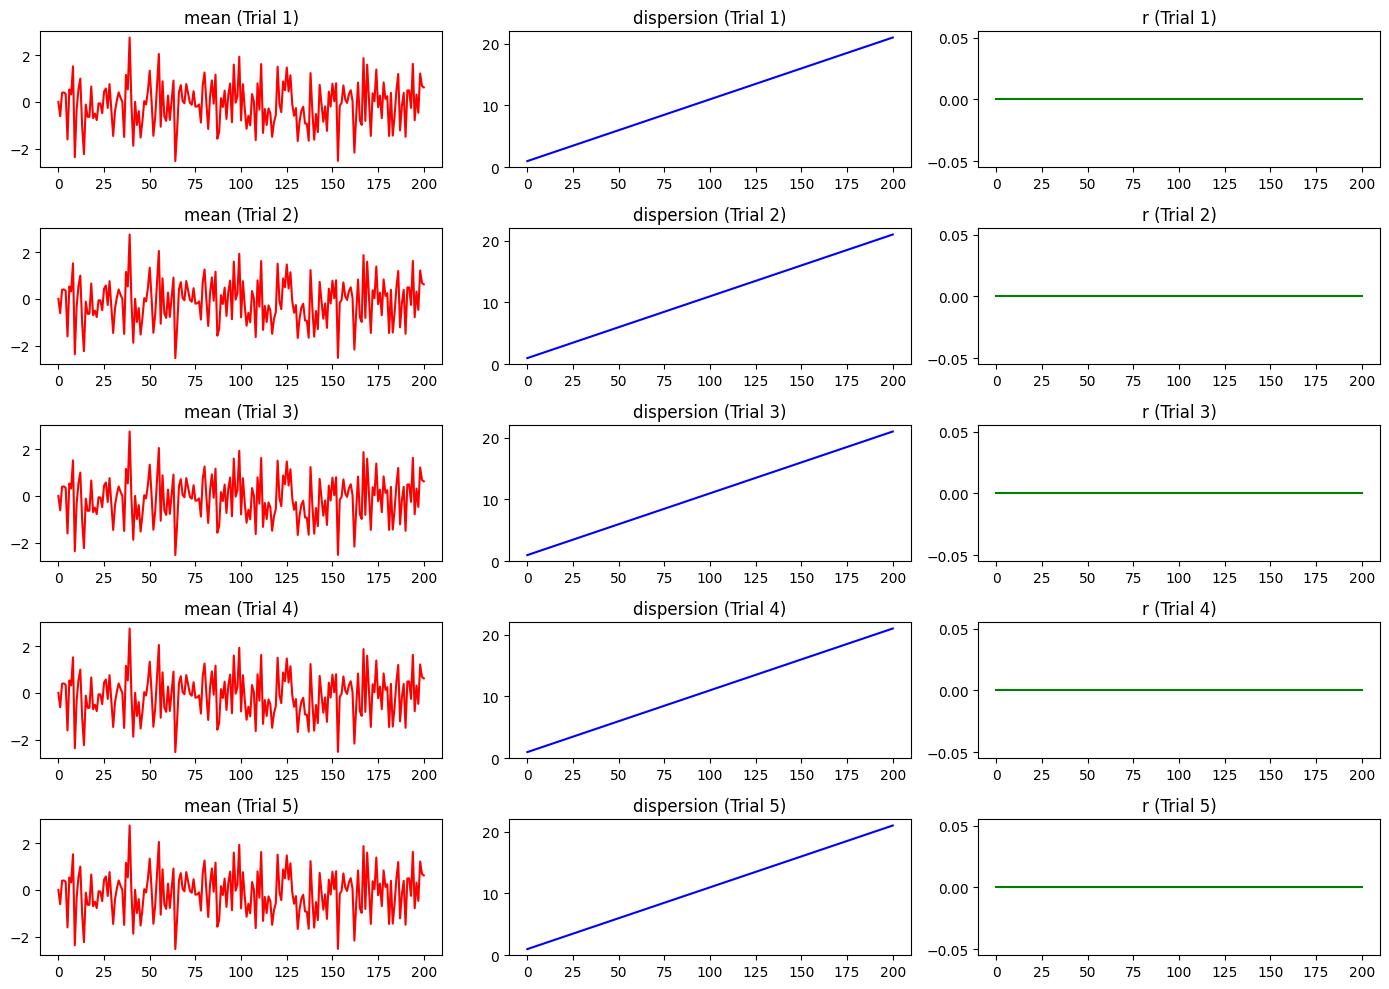

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

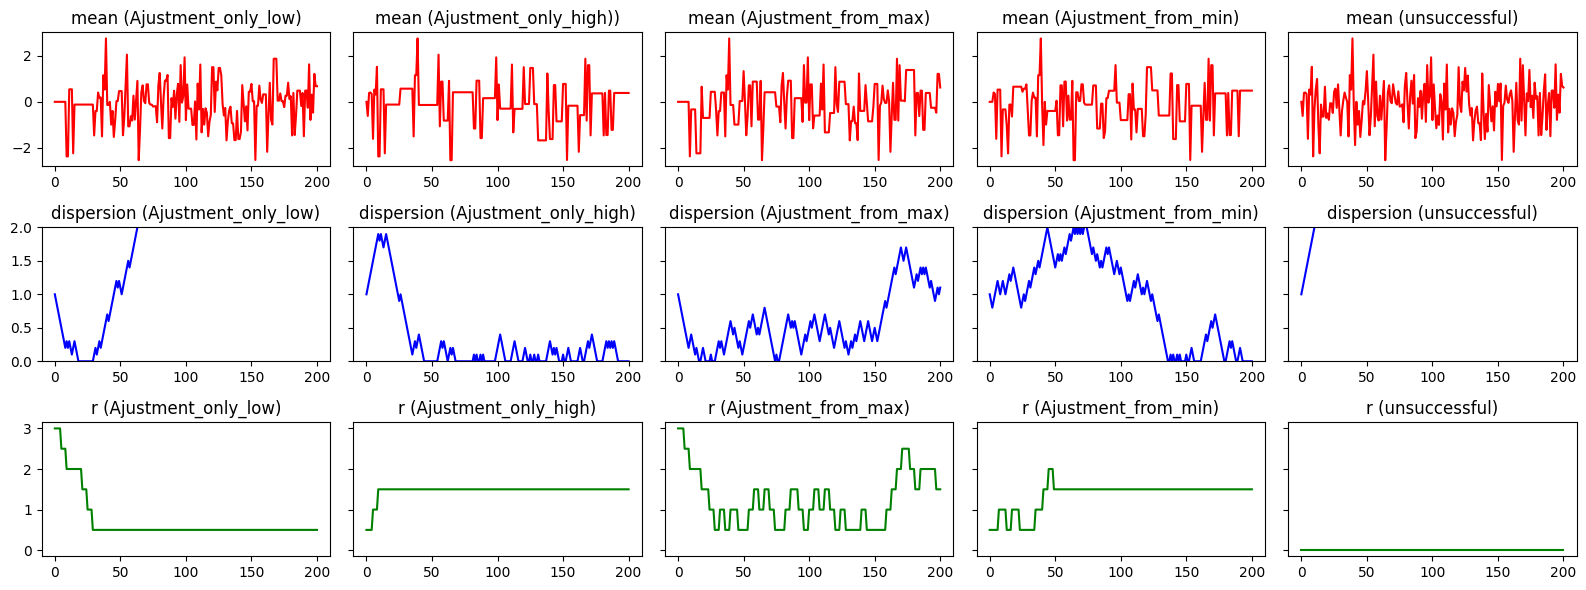

0

In [ ]:
alpha = 0.1       #成功した場合のやる気の変化量を表す変数
beta = 0.1    #失敗した場合のやる気の変化量を表す変数
a = 1  # どれだけの割合皿の中心を落下地点に移動させるかを表す変数（a=1なら落下地点に移動）
rt = 0.5
Kendama(alpha,beta,a,rt)

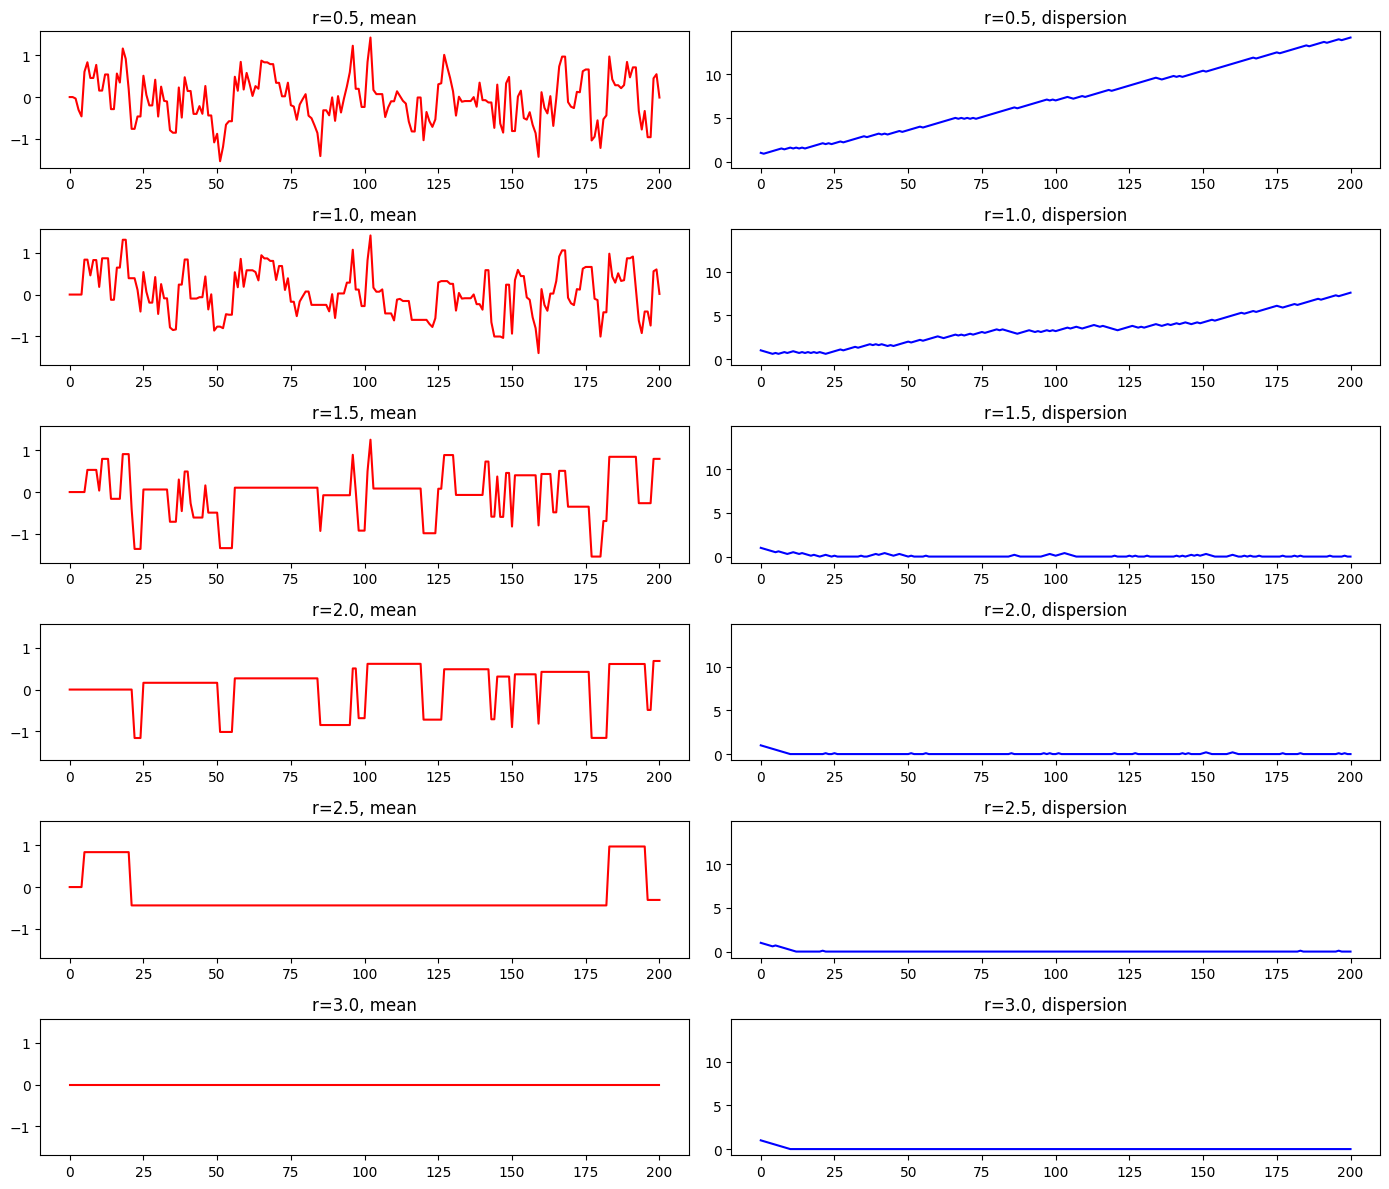

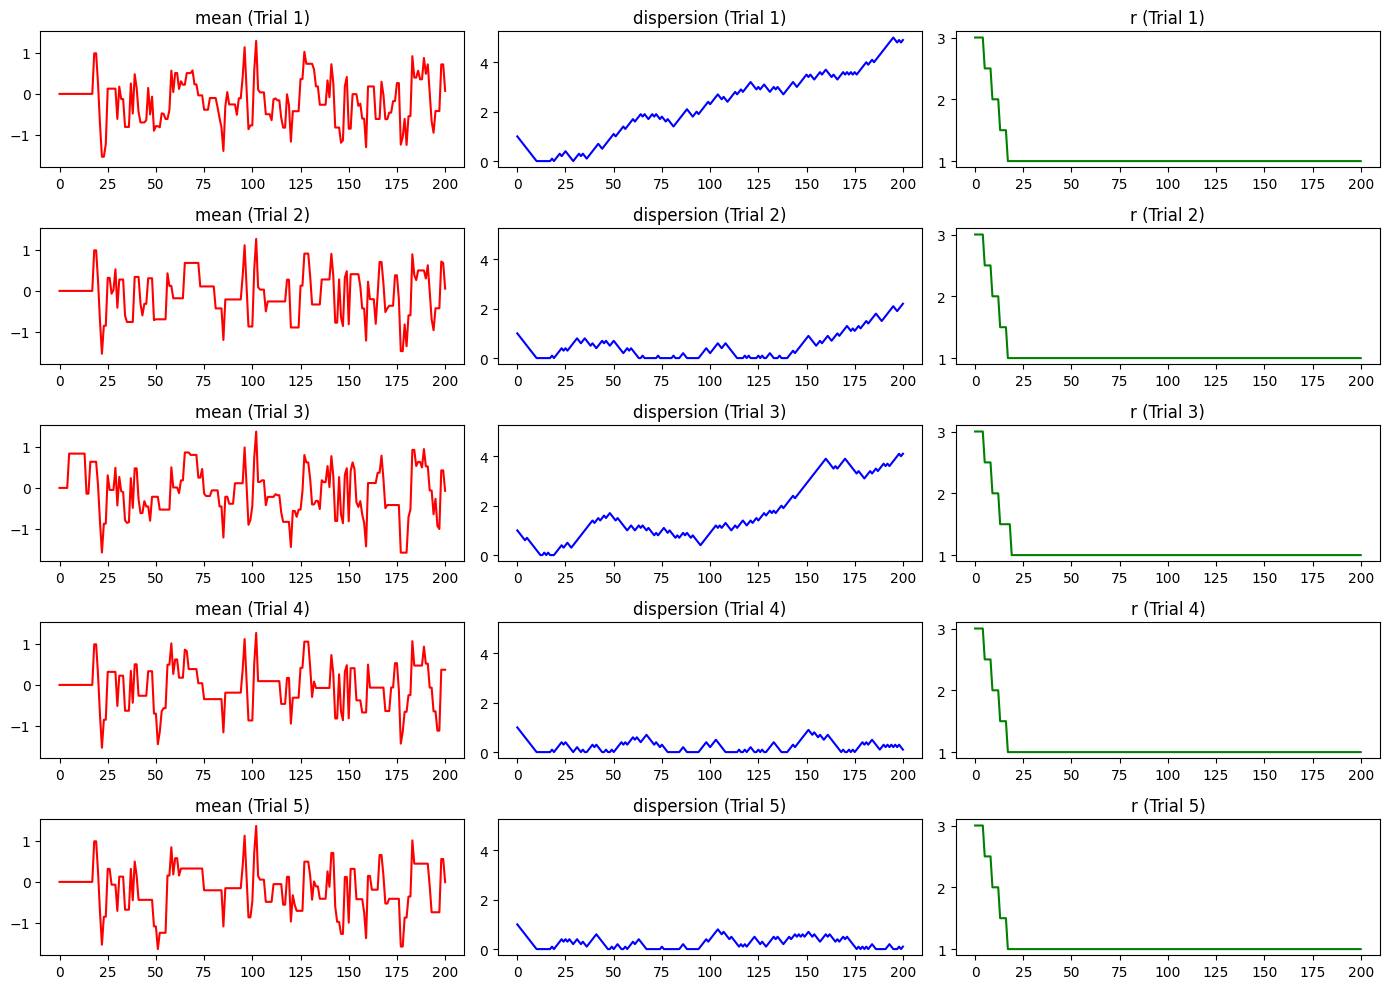

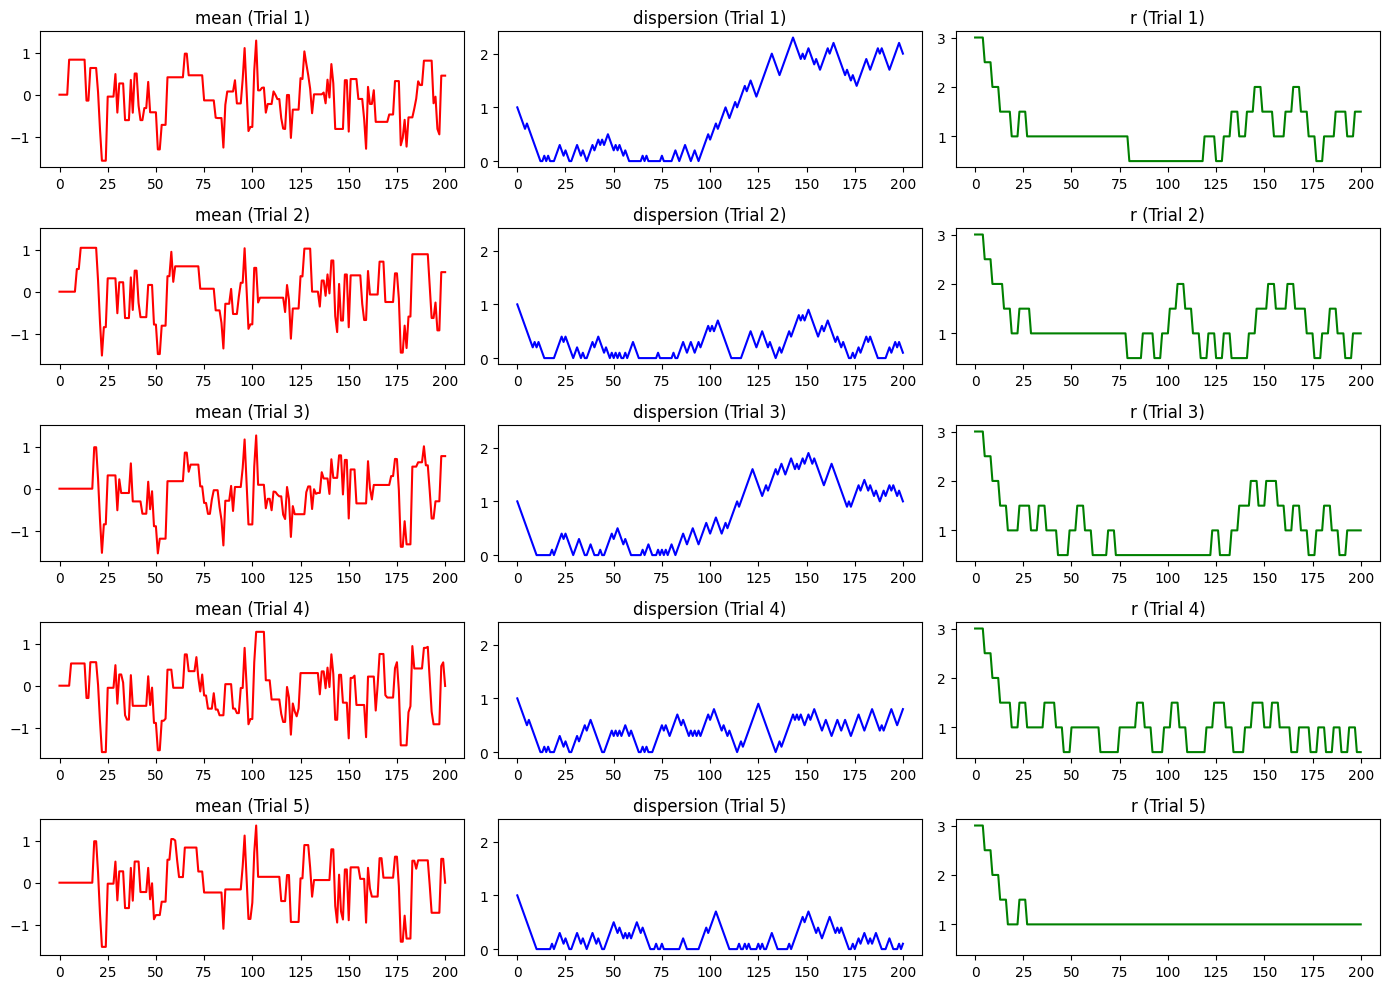

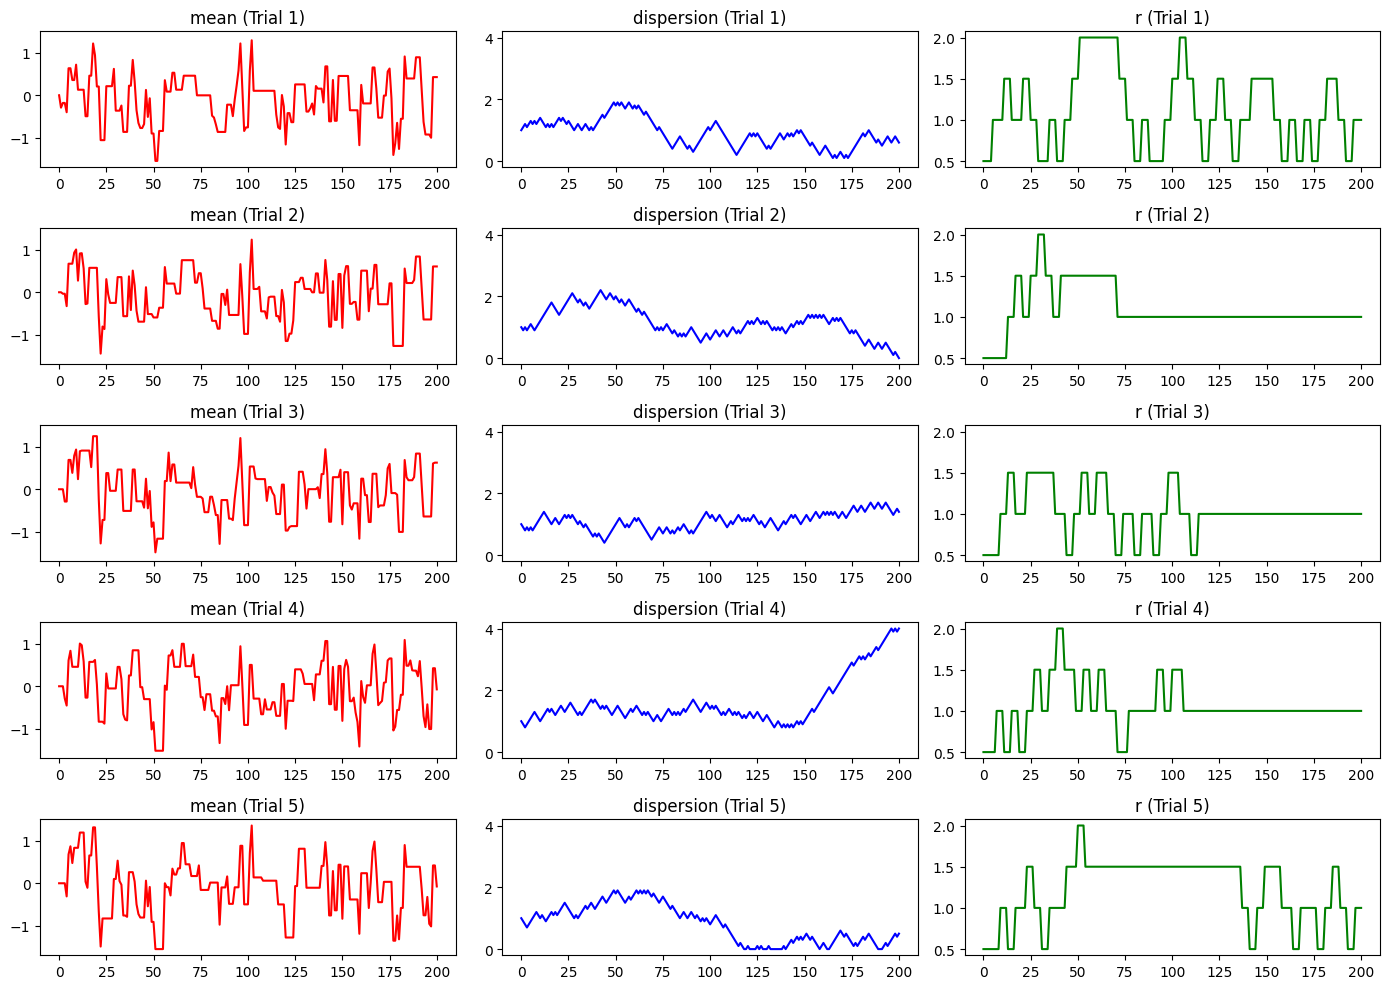

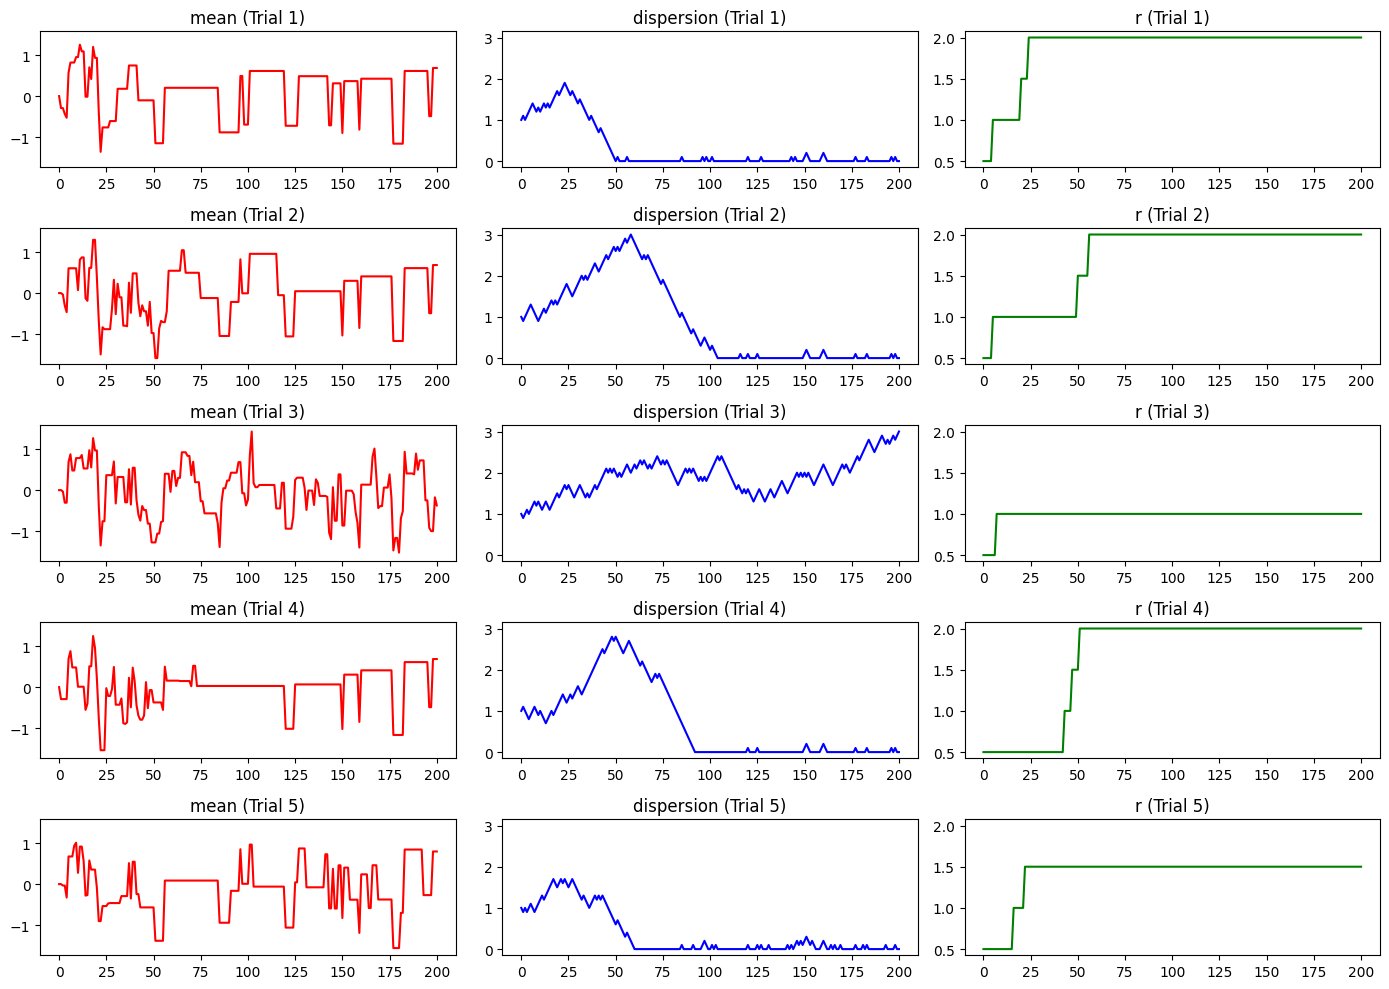

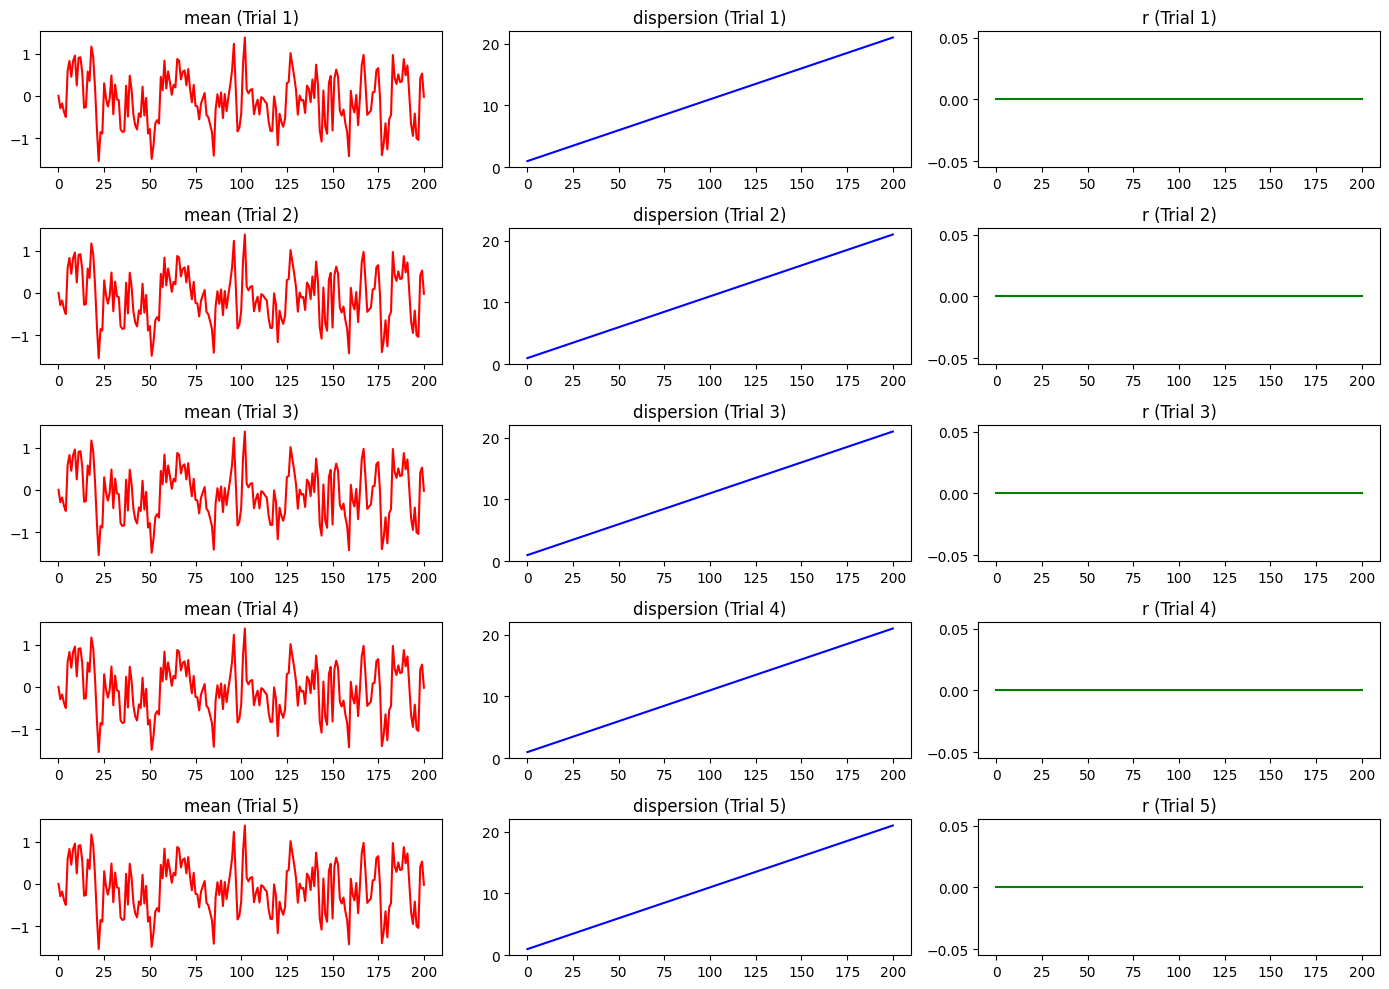

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

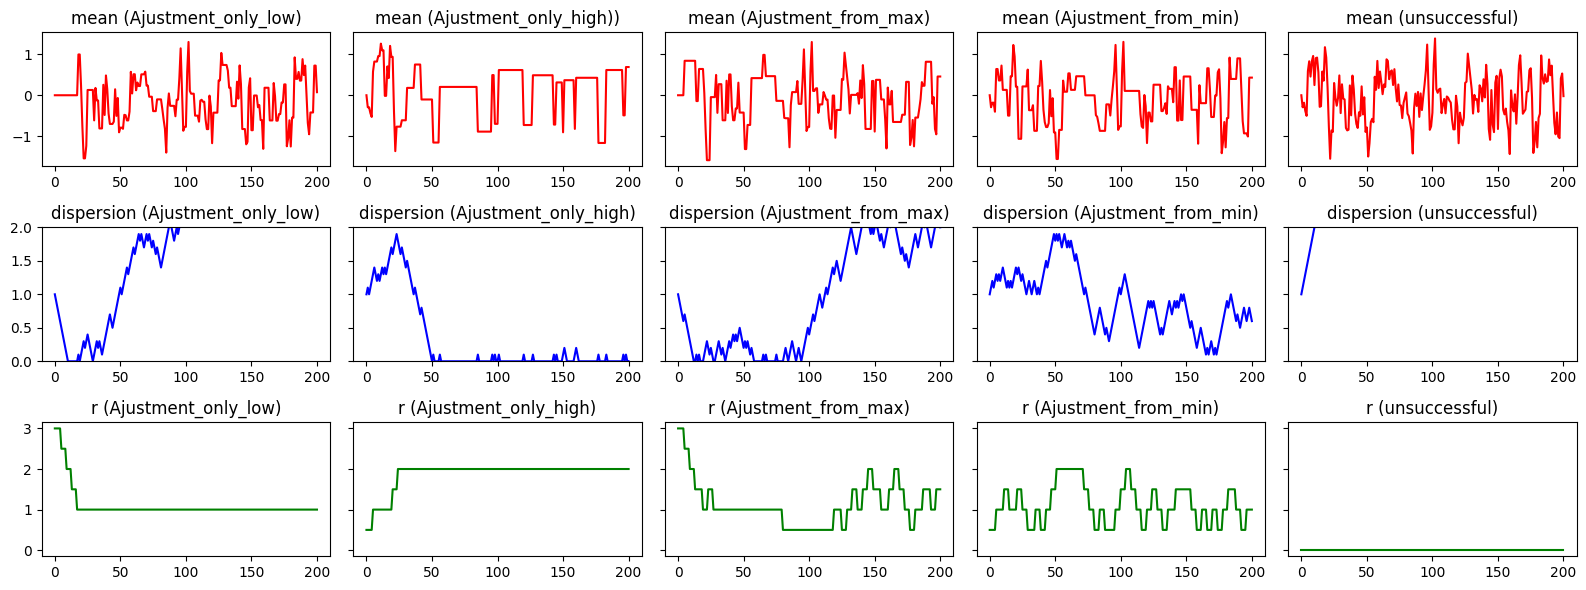

0

In [ ]:
alpha = 0.1       #成功した場合のやる気の変化量を表す変数
beta = 0.1    #失敗した場合のやる気の変化量を表す変数
a = 0.5  # どれだけの割合皿の中心を落下地点に移動させるかを表す変数（a=1なら落下地点に移動）
rt = 0.5
Kendama(alpha,beta,a,rt)

In [ ]:
def Min_ajustment(r,B,alpha,beta,a,rt): #難易度を調整した場合（半径を小さくする場合のみ）の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  x = []
  R = []
  R.append(r)
  for i in range(len(B)):
    x.append(i)
    R.append(r)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      r -= rt
      if r <= 0:
        r = 0.5
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
  x.append(len(B))
  return x,p,dispersion,R

def Max_ajustment(r,B,alpha,beta,a,rt): #難易度を調整した場合（半径を大きくする場合のみ）の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  trial = 0       #試行回数を表す変数
  x = []
  R = []
  R.append(r)
  for i in range(len(B)):
    x.append(i)
    R.append(r)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
      r += rt
  x.append(len(B))
  return x,p,dispersion,R

def Ajustment(r,B,alpha,beta,a,rt): #難易度を調整した場合（半径を小さくしたり大きくしたり）の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  x = []
  R = []
  R.append(r)
  for i in range(len(B)):
    x.append(i)
    R.append(r)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      r -= rt
      if r <= 0:
        r = 0.5
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
      r += rt
  x.append(len(B))
  return x,p,dispersion,R

def Kendama(alpha, beta,a,rt):
    r = 1  # 皿の半径を表す変数
    B = np.random.normal(loc=0, scale=1, size=200)  # けん玉の落下データを格納する配列（locは平均、scaleは標準偏差、sizeは導かれる値の数）

    #半径を小さくする場合のみの分散データを格納
    data_list = []

    for i in range(5):
        r = 3.0
        Yes_x, Yes_p, Yes_dispersion, R = Min_ajustment(r, B, alpha, beta, a,rt)
        data_list.append((Yes_x, Yes_p, Yes_dispersion, R))

    # サブプロットの設定
    fig, axs = plt.subplots(len(data_list), 3, figsize=(14, 2 * len(data_list)), sharey="col")

    # グラフのプロット
    for i, (Yes_x, Yes_p, Yes_dispersion, R) in enumerate(data_list):
        axs[i, 0].plot(Yes_x, Yes_p, color='r')
        axs[i, 1].plot(Yes_x, Yes_dispersion, color='b')
        axs[i, 2].plot(Yes_x, R, color='g')

        axs[i, 0].set_title(f"mean (Trial {i+1})")
        axs[i, 1].set_title(f"dispersion (Trial {i+1})")
        axs[i, 2].set_title(f"r (Trial {i+1})")

    plt.tight_layout()
    plt.show()

    # 簡単な方から調整した場合の分散のデータを格納
    A_list = []

    for i in range(5):
        r = 3.0
        A_x, A_p, A_dispersion, R = Ajustment(r, B, alpha, beta, a,rt)
        A_list.append((A_x, A_p, A_dispersion, R))

    # サブプロットの設定
    fig, axs = plt.subplots(len(A_list), 3, figsize=(14, 2 * len(A_list)), sharey="col")

    # グラフのプロット
    for i, (A_x, A_p, A_dispersion, R) in enumerate(A_list):
        axs[i, 0].plot(A_x, A_p, color='r')
        axs[i, 1].plot(A_x, A_dispersion, color='b')
        axs[i, 2].plot(A_x, R, color='g')

        axs[i, 0].set_title(f"mean (Trial {i+1})")
        axs[i, 1].set_title(f"dispersion (Trial {i+1})")
        axs[i, 2].set_title(f"r (Trial {i+1})")

    plt.tight_layout()
    plt.show()

    # 難しい方から調整した場合の分散のデータを格納
    A_min_list = []

    for i in range(5):
        r = 0.5
        A_x, A_p, A_dispersion, R = Ajustment(r, B, alpha, beta, a,rt)
        A_min_list.append((A_x, A_p, A_dispersion, R))

    # サブプロットの設定
    fig, axs = plt.subplots(len(A_min_list), 3, figsize=(14, 2 * len(A_min_list)), sharey="col")

    # グラフのプロット
    for i, (A_x, A_p, A_dispersion, R) in enumerate(A_min_list):
        axs[i, 0].plot(A_x, A_p, color='r')
        axs[i, 1].plot(A_x, A_dispersion, color='b')
        axs[i, 2].plot(A_x, R, color='g')

        axs[i, 0].set_title(f"mean (Trial {i+1})")
        axs[i, 1].set_title(f"dispersion (Trial {i+1})")
        axs[i, 2].set_title(f"r (Trial {i+1})")

    plt.tight_layout()
    plt.show()

    # 半径を大きくした場合のみの分散データを格納
    Max_data = []

    for i in range(5):
        r = 0
        max_x, max_p, max_dispersion, max_R = Max_ajustment(r, B, alpha, beta, a,rt)
        Max_data.append((max_x, max_p, max_dispersion, max_R))

    # サブプロットの設定
    fig, axs = plt.subplots(len(Max_data), 3, figsize=(14, 2* len(Max_data)),sharey="col")

    # グラフのプロット
    for i, (max_x, max_p, max_dispersion, max_R) in enumerate(Max_data):
        axs[i, 0].plot(max_x, max_p,color='r')
        axs[i, 1].plot(max_x, max_dispersion,color='b')
        axs[i, 2].plot(max_x, max_R,color='g')

        axs[i, 0].set_title(f"mean (Trial {i+1})")
        axs[i, 1].set_title(f"dispersion (Trial {i+1})")
        axs[i, 2].set_title(f"r (Trial {i+1})")

    # レイアウトの調整
    plt.tight_layout()

    # グラフの表示
    plt.show()

        # プロットするデータのリスト
    data = []

    for i in range(5):
        r = 0
        Yes_x, Yes_p, Yes_dispersion, R = Min_ajustment(r, B, alpha, beta, a,rt)
        data.append((Yes_x, Yes_p, Yes_dispersion, R))

    # サブプロットの設定
    fig, axs = plt.subplots(len(data), 3, figsize=(14, 2* len(data)),sharey="col")

    # グラフのプロット
    for i, (Yes_x, Yes_p, Yes_dispersion, R) in enumerate(data):
        axs[i, 0].plot(Yes_x, Yes_p,color='r')
        axs[i, 1].plot(Yes_x, Yes_dispersion,color='b')
        axs[i, 2].plot(Yes_x, R,color='g')

        axs[i, 0].set_title(f"mean (Trial {i+1})")
        axs[i, 1].set_title(f"dispersion (Trial {i+1})")
        axs[i, 2].set_title(f"r (Trial {i+1})")

    # レイアウトの調整
    plt.tight_layout()

    # グラフの表示
    plt.show()

    # サブプロットの設定
    fig, axs = plt.subplots(3, 5, figsize=(16, 2* 3),sharey="row")

    axs[0, 0].plot(data_list[0][0], data_list[0][1],color='r')
    axs[1, 0].plot(data_list[0][0], data_list[0][2],color='b')
    axs[1, 0].set_ylim(0,2)
    axs[2, 0].plot(data_list[0][0], data_list[0][3],color='g')
    axs[0, 0].set_title(f"mean (Ajustment_only_low)")
    axs[1, 0].set_title(f"dispersion (Ajustment_only_low)")
    axs[2, 0].set_title(f"r (Ajustment_only_low)")

    axs[0, 1].plot(Max_data[0][0], Max_data[0][1],color='r')
    axs[1, 1].plot(Max_data[0][0], Max_data[0][2],color='b')
    axs[2, 1].plot(Max_data[0][0], Max_data[0][3],color='g')
    axs[0, 1].set_title(f"mean (Ajustment_only_high))")
    axs[1, 1].set_title(f"dispersion (Ajustment_only_high)")
    axs[2, 1].set_title(f"r (Ajustment_only_high)")

    axs[0, 2].plot(A_list[0][0], A_list[0][1],color='r')
    axs[1, 2].plot(A_list[0][0], A_list[0][2],color='b')
    axs[2, 2].plot(A_list[0][0], A_list[0][3],color='g')
    axs[0, 2].set_title(f"mean (Ajustment_from_max)")
    axs[1, 2].set_title(f"dispersion (Ajustment_from_max)")
    axs[2, 2].set_title(f"r (Ajustment_from_max)")
    # グラフのプロット
    axs[0, 3].plot(A_min_list[0][0], A_min_list[0][1],color='r')
    axs[1, 3].plot(A_min_list[0][0], A_min_list[0][2],color='b')
    axs[2, 3].plot(A_min_list[0][0], A_min_list[0][3],color='g')
    axs[0, 3].set_title(f"mean (Ajustment_from_min)")
    axs[1, 3].set_title(f"dispersion (Ajustment_from_min)")
    axs[2, 3].set_title(f"r (Ajustment_from_min)")

    axs[0, 4].plot(data[0][0], data[0][1],color='r')
    axs[1, 4].plot(data[0][0], data[0][2],color='b')
    axs[2, 4].plot(data[0][0], data[0][3],color='g')
    axs[0, 4].set_title(f"mean (unsuccessful)")
    axs[1, 4].set_title(f"dispersion (unsuccessful)")
    axs[2, 4].set_title(f"r (unsuccessful)")


    # レイアウトの調整
    plt.tight_layout()
    plt.savefig("Ajustment_every.png")
    files.download('Ajustment_every.png')
    # グラフの表示
    plt.show()


    return 0

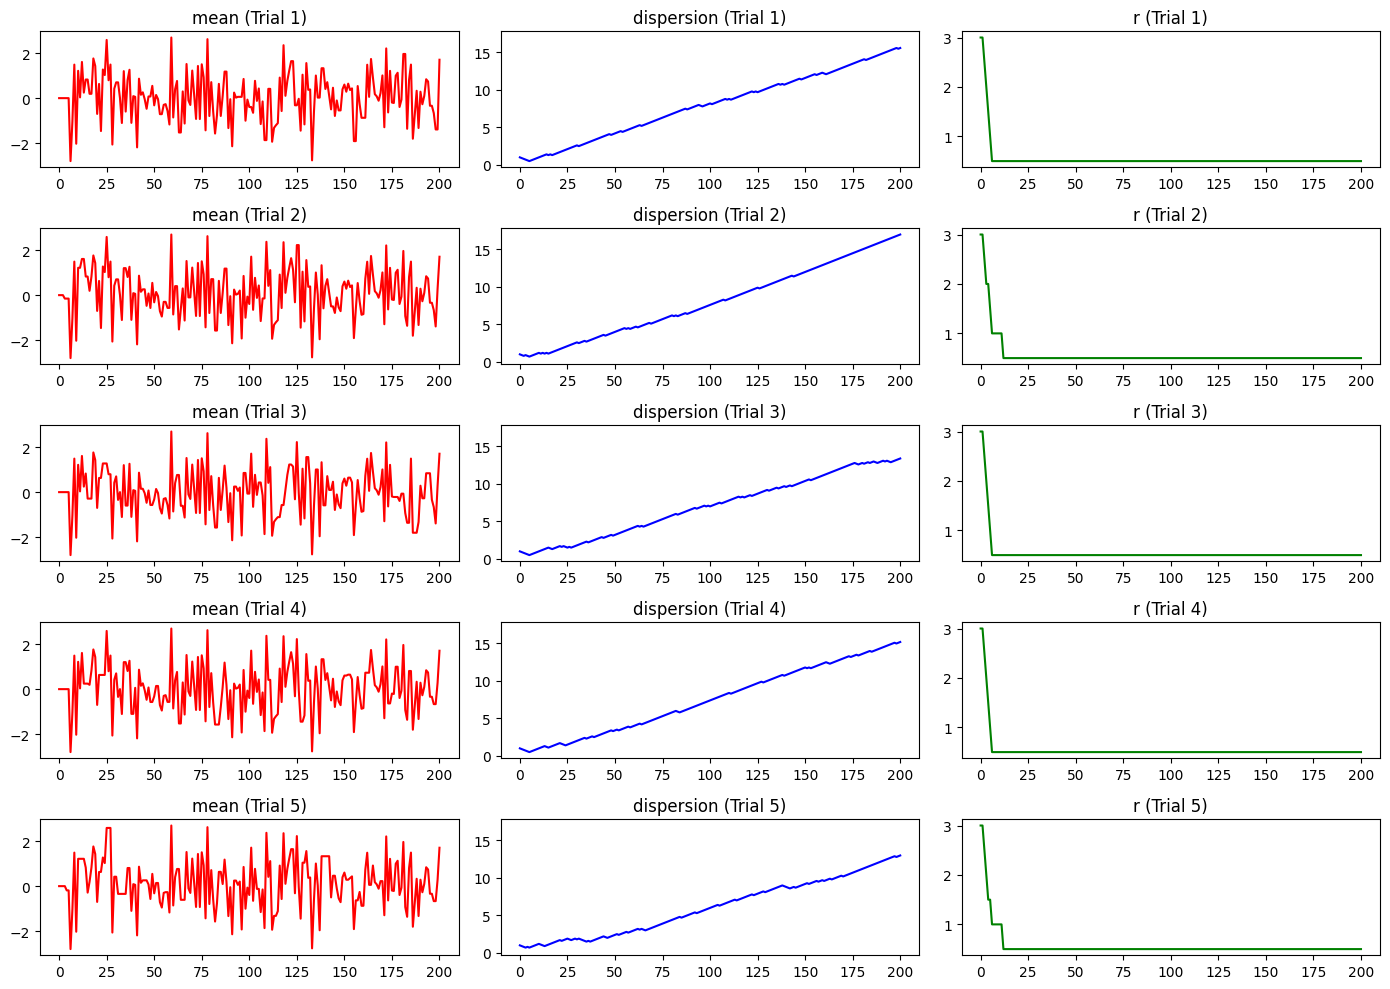

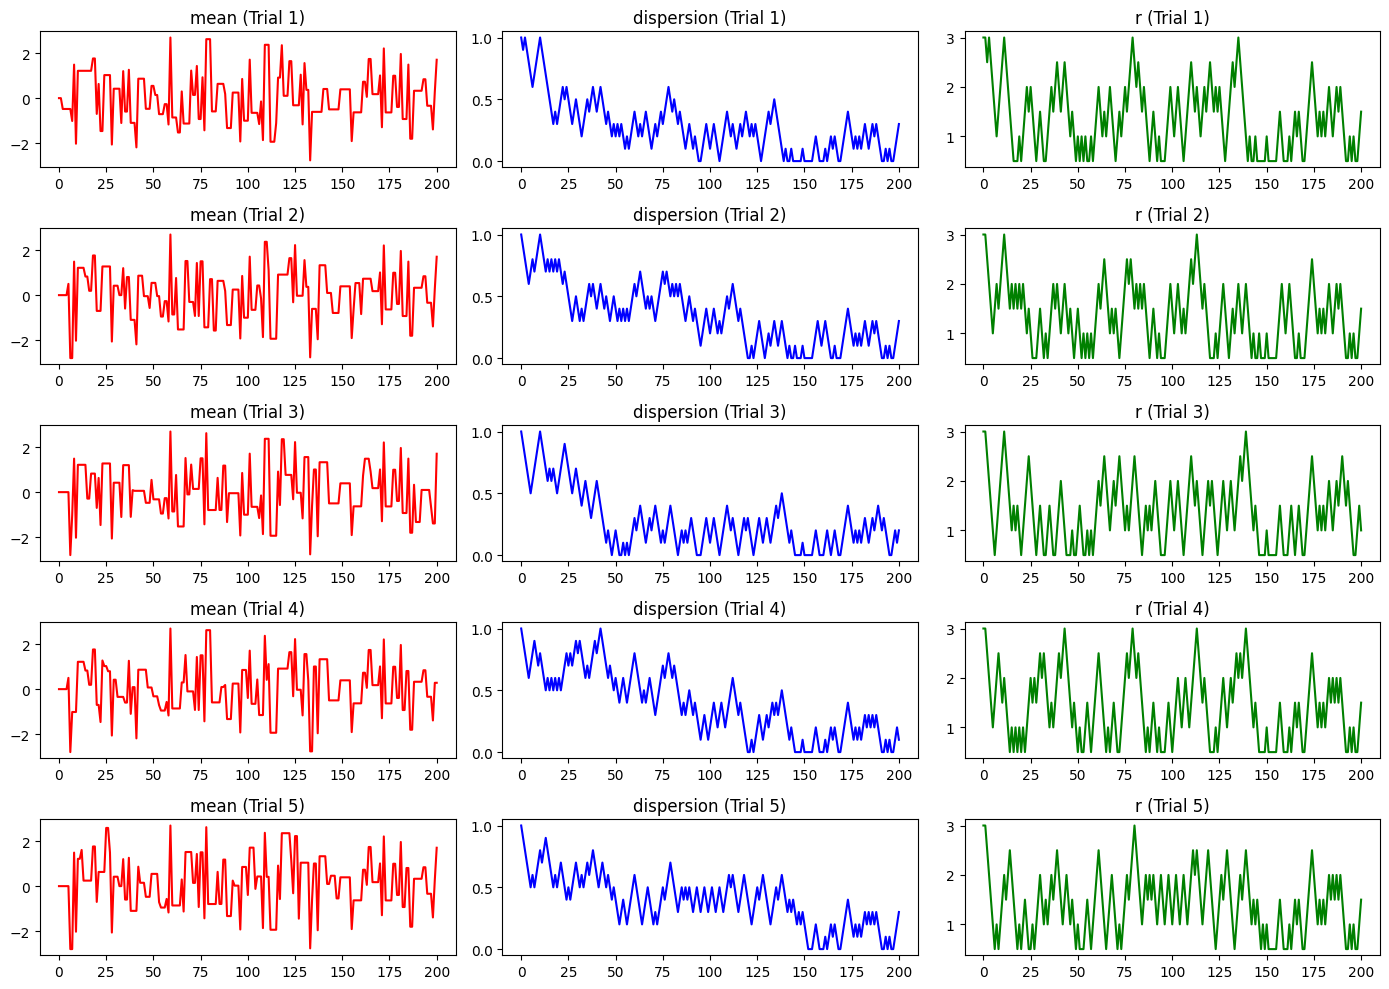

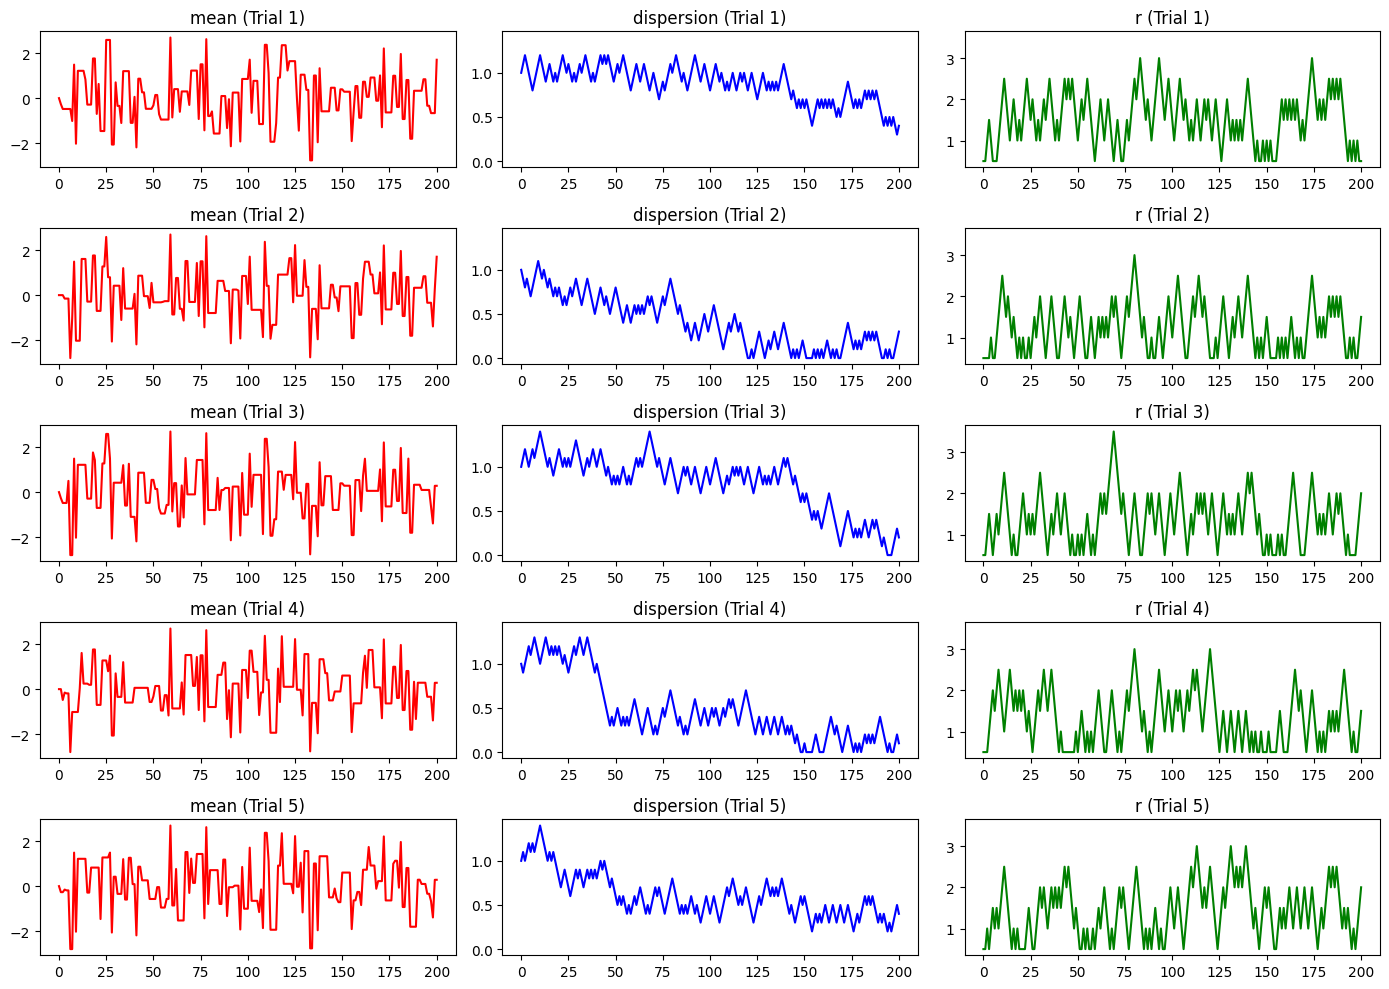

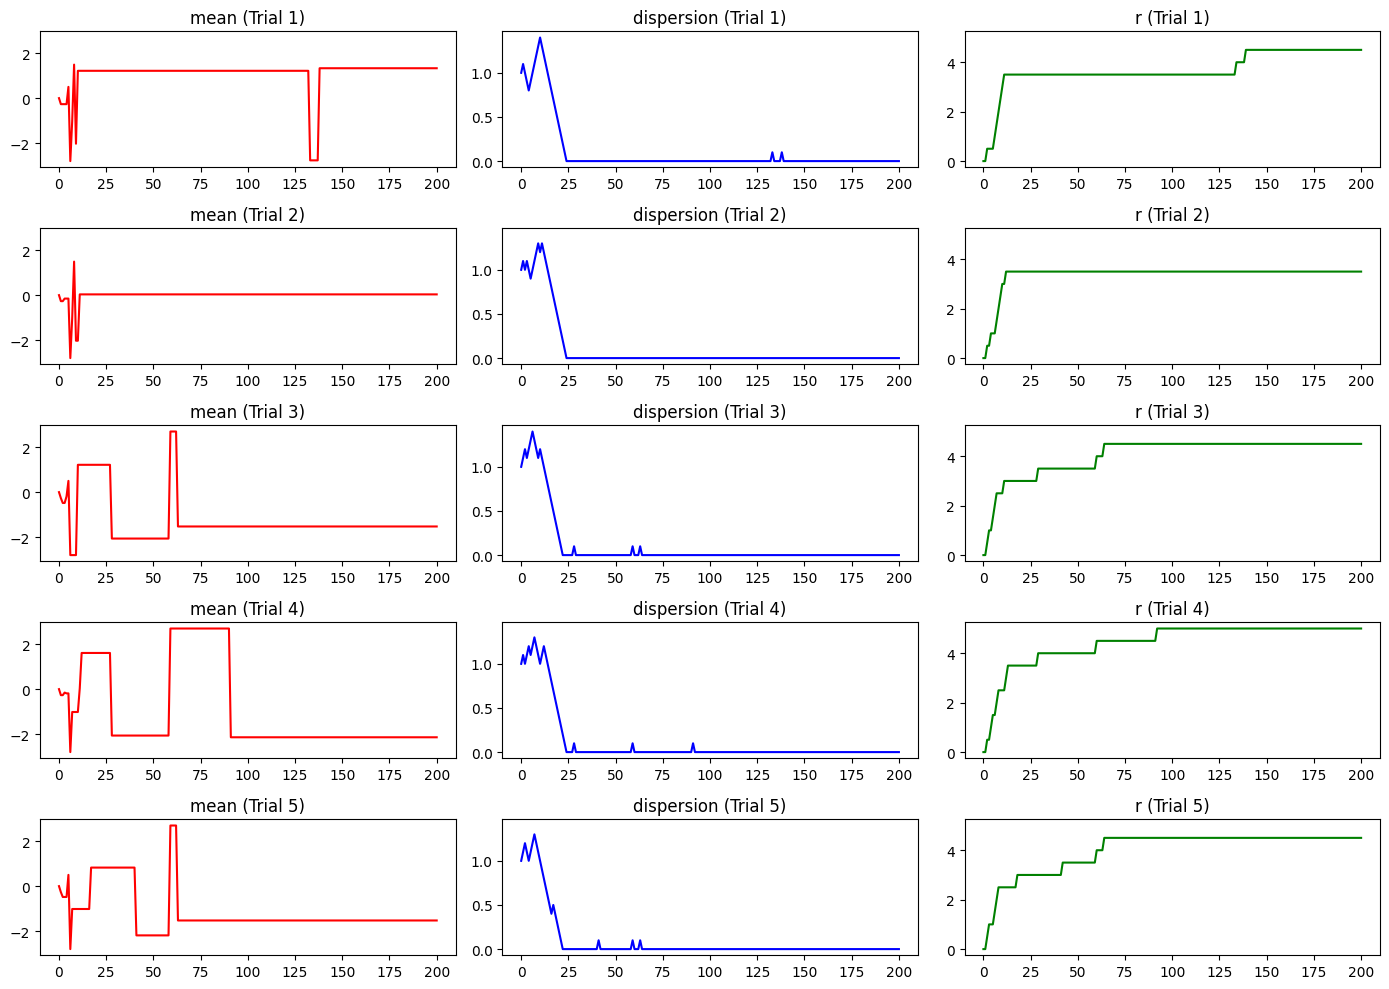

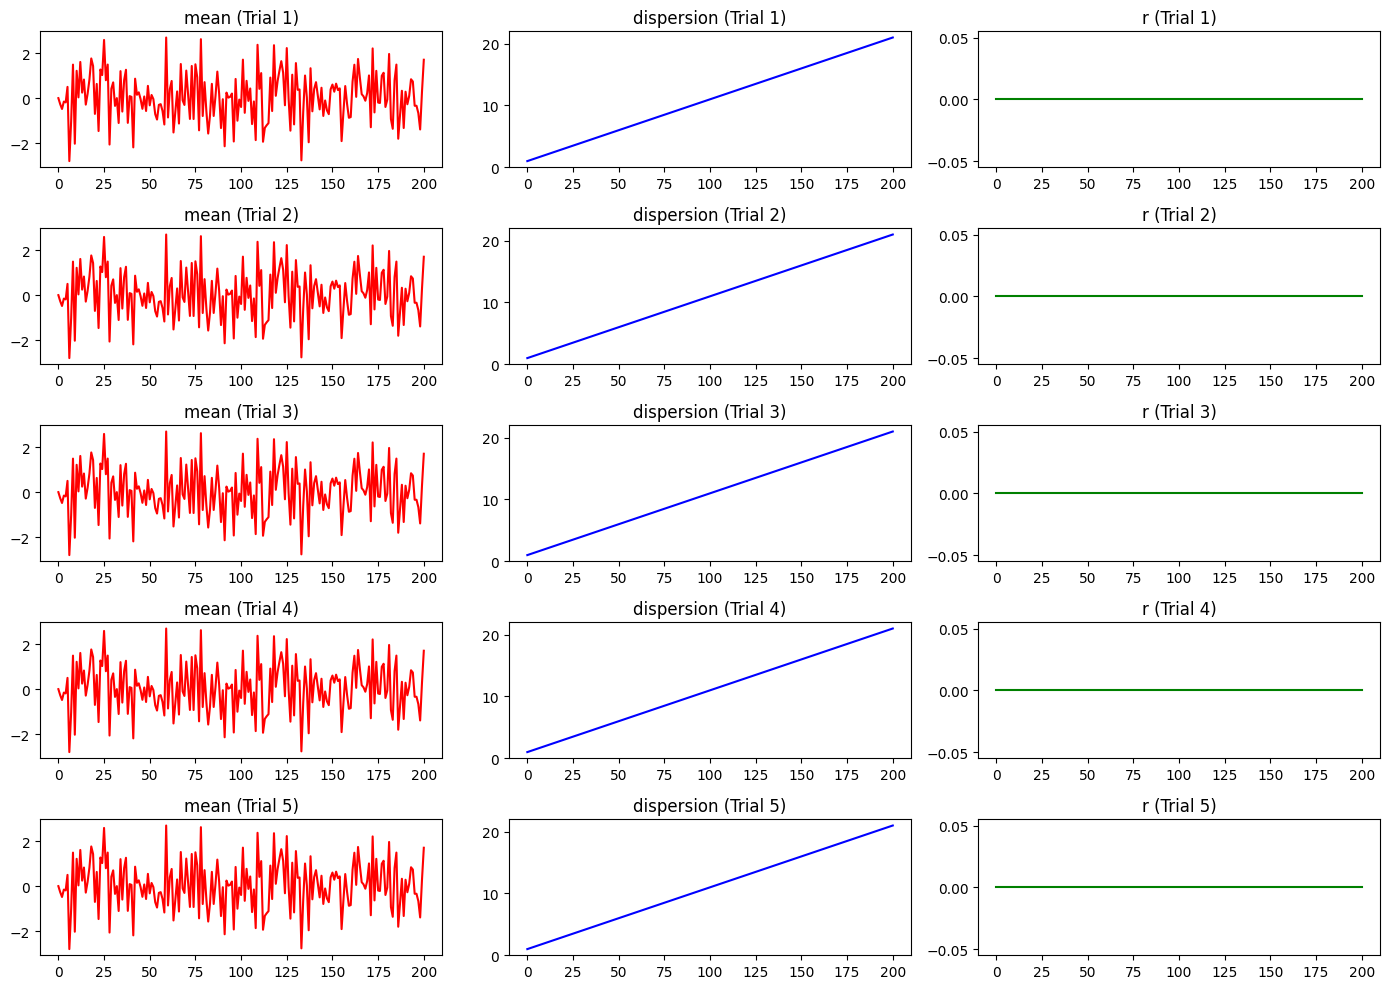

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

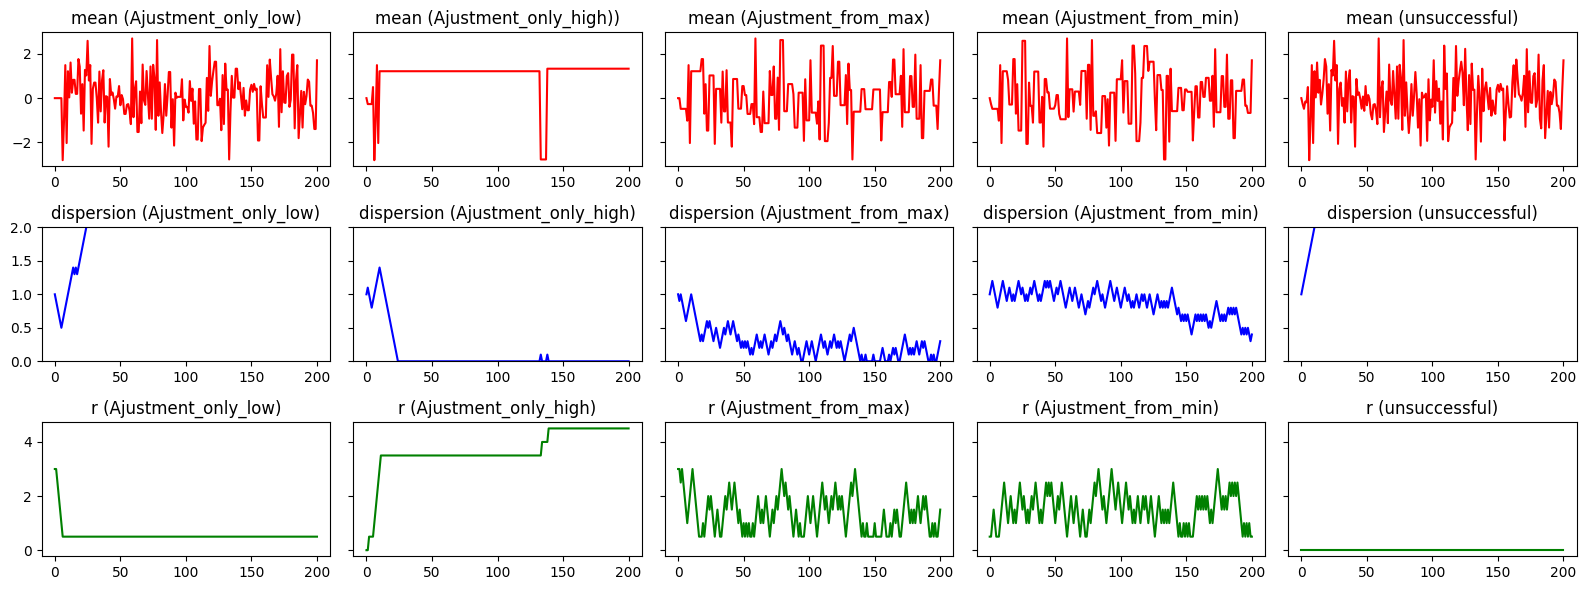

0

In [ ]:
alpha = 0.1       #成功した場合のやる気の変化量を表す変数
beta = 0.1    #失敗した場合のやる気の変化量を表す変数
a = 1  # どれだけの割合皿の中心を落下地点に移動させるかを表す変数（a=1なら落下地点に移動）
rt = 0.5
Kendama(alpha,beta,a,rt)